In [1]:
%matplotlib inline
import torch


# tSNE to visualize digits


Here we use :class:`sklearn.manifold.TSNE` to visualize the digits
datasets. Indeed, the digits are vectors in a 8*8 = 64 dimensional space.
We want to project them in 2D for visualization. tSNE is often a good
solution, as it groups and separates data points based on their local
relationship.




Load the iris data



## load mnist

In [11]:
from datasets.mnist import get_mnist
from datasets.usps import get_usps
from datasets.genimg import get_genimg
from visual import get_dataset_features
from visual import get_tsne

In [3]:
genimgs_dataloader = get_genimg(True, batch_size=1024)
mnist_dataloader = get_genimg(True, batch_size=1024)
usps_dataloader = get_usps(True, batch_size=1024)
  
act_gen, label_gen = get_dataset_features(genimgs_dataloader,  2)
act_src, label_src = get_dataset_features(mnist_dataloader, 2)
act_tgt, label_tgt = get_dataset_features(usps_dataloader, 2)

loading  Generator  from  cache/models/generator.pt.tmp
keys in state dict starts with 'module.', trimming it.
model fully fits saved weights, performing complete load
loading  LeNet5Half  from  cache/models/student.pt.tmp
keys in state dict starts with 'module.', trimming it.
model fully fits saved weights, performing complete load
loading  Generator  from  cache/models/generator.pt.tmp
keys in state dict starts with 'module.', trimming it.
model fully fits saved weights, performing complete load
loading  LeNet5Half  from  cache/models/student.pt.tmp
keys in state dict starts with 'module.', trimming it.
model fully fits saved weights, performing complete load


In [4]:
print(act_src.shape)
print(label_tgt.shape)

torch.Size([2048, 1024])
torch.Size([2048])


Fit and transform with a TSNE



In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, verbose=1)

Project the data in 2D



In [6]:
data, labels = act_src, label_src
X_2d = tsne.fit_transform(data.numpy())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.228s...
[t-SNE] Computed neighbors for 2048 samples in 11.375s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 8.021810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.496719
[t-SNE] KL divergence after 1000 iterations: 2.580667


In [7]:
print(data.shape)
print(labels.shape)
print(X_2d[:,0].shape)

torch.Size([2048, 1024])
torch.Size([2048])
(2048,)


Visualize the data



In [12]:
import seaborn as sns
import pandas as pd


res = get_tsne(data.numpy(), labels.numpy())


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.202s...
[t-SNE] Computed neighbors for 2048 samples in 10.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 8.021810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.496719
[t-SNE] KL divergence after 1000 iterations: 2.580667
time elapsed: 35.826210737228394 seconds


ValueError: Could not interpret input 'd0'

<Figure size 1152x720 with 0 Axes>

In [24]:
res = pd.DataFrame()
res['d0'] = X_2d[:,0]
res['d1'] = X_2d[:,1]
res['label'] = labels.numpy()

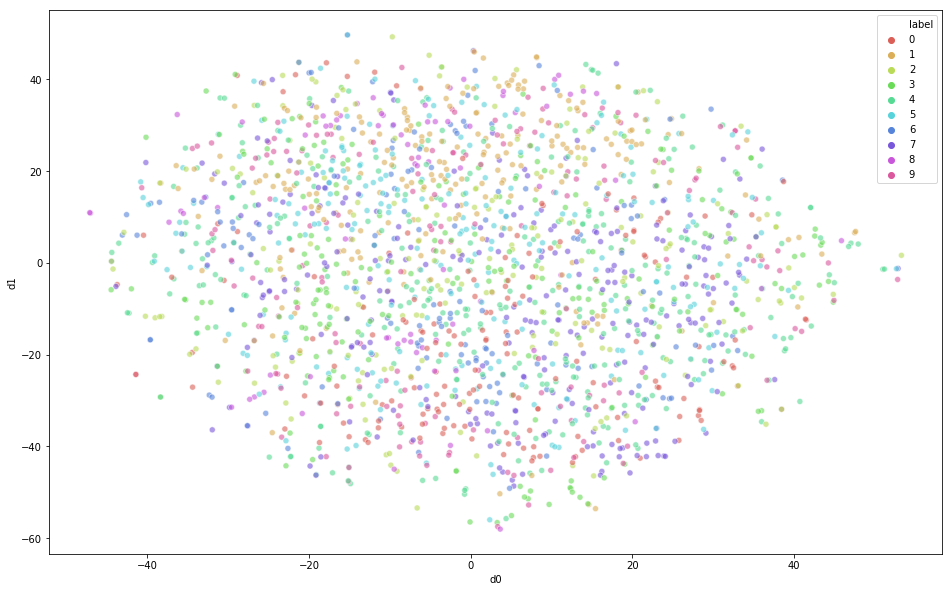

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(
        x="d0", y="d1",
        hue="label",
        palette=sns.color_palette("hls", 10),
        data=res,
        legend='full',
        alpha=0.6
    )
plt.show()